## Read in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/uhc_data.csv')
df['weights'] = 1.0/df.uhc_variance
df.head()

,location_id,year_id,physicians,nurses,uhc,uhc_variance,weights
0,6,1990,8.498420,7.458451,0.533304,0.000051,19750.634112
1,6,1991,9.184645,7.949018,0.537839,0.000051,19617.585784
2,6,1992,9.858267,8.474302,0.542701,0.000051,19491.179889
3,6,1993,10.543810,9.034594,0.550867,0.000050,19838.147609
4,6,1994,11.254521,9.627584,0.560277,0.000047,21153.114963


## Build model

In [3]:
from sfma import Data, Variable, SplineVariable, SplineSpecs, SplineUniformPrior
from sfma.model import SFMAModel

In [4]:
data = Data(
    col_obs="uhc",
    col_covs=["physicians"],
    col_weights="weights",
    df=df
)

In [5]:
spline_priors = [
    SplineUniformPrior(order=1, lb=0.0, ub=np.inf, size=50),
    SplineUniformPrior(order=2, lb=-np.inf, ub=0.0, size=20)
]

In [6]:
variables = [
    SplineVariable("physicians",
                   spline_specs=SplineSpecs(
                       knots=np.linspace(0.0, 1.0, 4),
                       degree=3,
                       knots_type="rel_domain",
                       r_linear=True
                   ),
                   priors=spline_priors)
]

In [7]:
model = SFMAModel(data, variables)

In [8]:
model.fit(outlier_pct=0.15, num_steps=10)

/Users/zhengp/code/sfma/env/lib/python3.8/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


In [10]:
model.opt_result

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 919
      cg_stop_cond: 4
            constr: [array([ 3.13557799e-02,  2.76338319e-02,  2.41469543e-02,  2.08951471e-02,
        1.78784103e-02,  1.50967440e-02,  1.25501480e-02,  1.02386224e-02,
        8.16216721e-03,  6.32078242e-03,  4.71446803e-03,  3.34322404e-03,
        2.20705044e-03,  1.30594725e-03,  6.39914450e-04,  2.08952052e-04,
        1.30600522e-05,  5.84659696e-10,  5.83709846e-10,  5.82779488e-10,
        5.81868631e-10,  5.80977270e-10,  5.80105384e-10,  5.79253019e-10,
        5.78420121e-10,  5.77606729e-10,  5.76812827e-10,  5.76038411e-10,
        5.75283505e-10,  5.74548076e-10,  5.73832135e-10,  5.73135733e-10,
        5.72458761e-10,  5.72018294e-10,  5.72018294e-10,  5.72018294e-10,
        5.72018294e-10,  5.72018294e-10,  5.72018294e-10,  5.72018294e-10,
        5.72018294e-10,  5.72018294e-10,  5.72018294e-10,  5.72018294e-10,
        5.72018294e-10, 

## Predict model

In [11]:
df_pred = pd.DataFrame({
    "physicians": np.linspace(df.physicians.min(), df.physicians.max(), 100)
})

In [12]:
df_pred["pred"] = model.predict(df_pred)

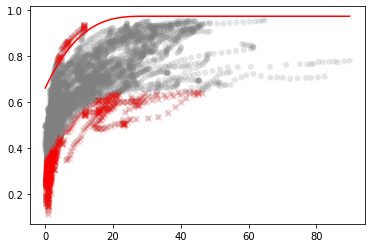

In [13]:
fig, ax = plt.subplots()
outlier_indices = data.trim_weights == 0.0
ax.scatter(df.physicians, df.uhc, color="gray", edgecolor="none", alpha=0.2)
ax.scatter(df.physicians[outlier_indices], df.uhc[outlier_indices], color="red", marker="x", alpha=0.2)
ax.plot(df_pred.physicians, df_pred.pred, color="red")

In [14]:
model.opt_vars

array([ 6.61915243e-01,  9.74460345e-01,  9.74460357e-01,  9.74460368e-01,
        9.74460374e-01,  4.37449725e-02, -1.60417989e-22])